**Used Car Price Prediction 
Step1 : Exploratory Data Analysis**
In this project, we have a look into the data related to used cars and understand the relationships among various variables and figure out the features which have a maximum impact on price. We use Correlation analysis, visualization techniques, outlier analysis, normal distribution analysis etc. The goal is to create a predictive model which can give an estimation of the price to a customer who wants to buy/sell a used car. The data is taken from https://www.kaggle.com/CooperUnion/cardataset,

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import pickle

In [89]:
#data=pd.read_csv('final_data.csv')
data=pd.read_csv('data.csv')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11864 entries, 0 to 11863
Data columns (total 16 columns):
Make                 11864 non-null object
Model                11864 non-null object
Year                 11864 non-null int64
Engine Fuel Type     11861 non-null object
Engine_HP            11795 non-null float64
Engine Cylinders     11834 non-null float64
Transmission Type    11864 non-null object
Driven_Wheels        11864 non-null object
Number of Doors      11858 non-null float64
Market Category      8122 non-null object
Vehicle Size         11864 non-null object
Vehicle Style        11864 non-null object
highway MPG          11864 non-null int64
city mpg             11864 non-null int64
Popularity           11864 non-null int64
MSRP                 11864 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [76]:
data.describe()

,Year,Engine_HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11864.000000,11795.000000,11834.000000,11858.000000,11864.000000,11864.000000,11864.000000,1.186400e+04
mean,2010.378540,248.106231,5.601234,3.436077,26.674646,19.769976,1560.941841,3.866735e+04
std,7.590445,107.221434,1.731324,0.881244,8.861805,8.988408,1441.843210,4.595984e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.994750e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.200000e+04
max,2017.000000,750.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,1.500000e+06


In [77]:
data_corr = data.select_dtypes(include=[np.number])
data_corr.shape

(11864, 8)

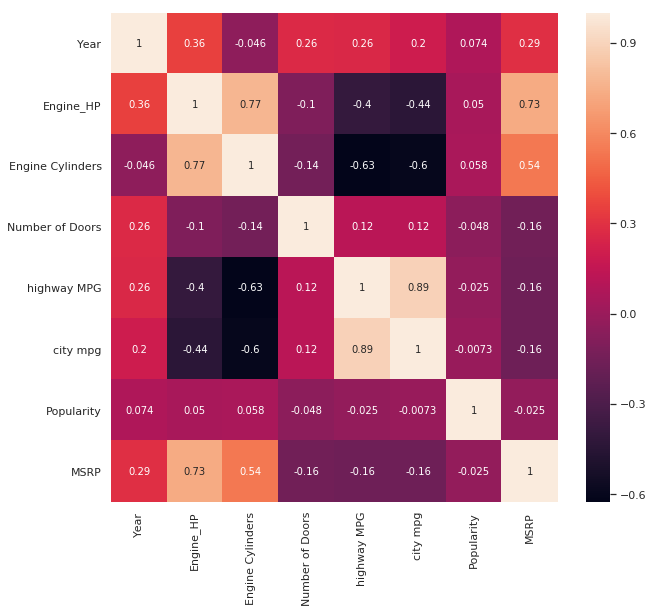

In [79]:
corr = data_corr.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr, annot=True)

In [80]:
print("Find most important features relative to target")
corr = data.corr()
corr.sort_values(['MSRP'], ascending=False, inplace=True)
corr.MSRP

Find most important features relative to target


MSRP                1.000000
Engine_HP           0.731633
Engine Cylinders    0.541977
Year                0.293134
Popularity         -0.025378
Number of Doors    -0.155597
city mpg           -0.162669
highway MPG        -0.163864
Name: MSRP, dtype: float64

Populating the interactive namespace from numpy and matplotlib


/home/kishore/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


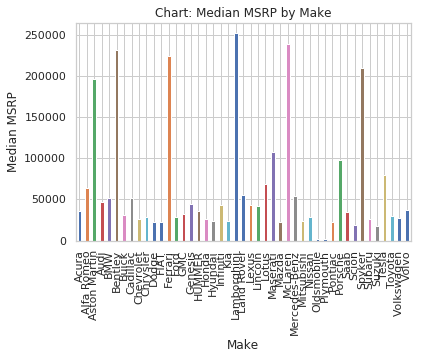

In [81]:
%pylab inline
Make=data.groupby(['Make'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Make')
show()

In [82]:
data["Make"].unique()
#data.columns[data.isnull().any()]

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Pontiac', 'Porsche', 'Saab', 'GMC', 'Hyundai',
       'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford', 'Cadillac',
       'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini', 'Lincoln',
       'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura', 'Maserati',
       'Lexus', 'Aston Martin', 'Land Rover', 'Lotus', 'Infiniti',
       'Scion', 'Genesis', 'HUMMER', 'Tesla'], dtype=object)

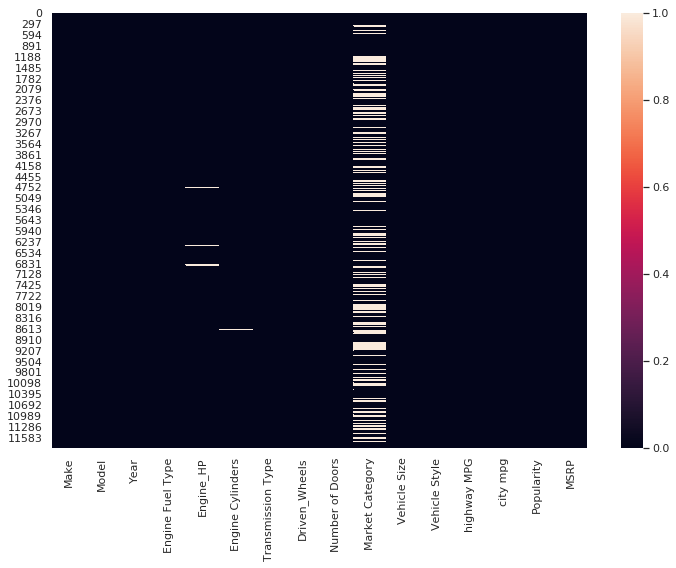

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull())
plt.show()

In [84]:
Isnull = data.isnull().sum()/len(data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Market Category     31.540796
Engine_HP            0.581591
Engine Cylinders     0.252866
Number of Doors      0.050573
Engine Fuel Type     0.025287
dtype: float64

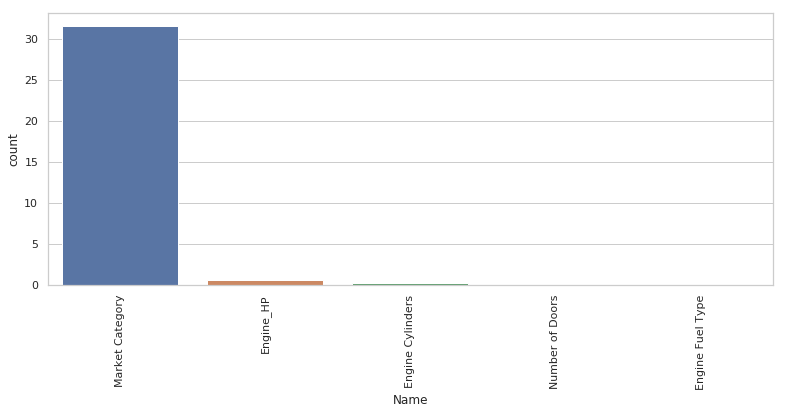

In [85]:
##analysis#Convert into dataframe

Isnull = Isnull.to_frame()

Isnull.columns = ['count']

Isnull.index.names = ['Name']

Isnull['Name'] = Isnull.index

#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [86]:
Isnull = data.isnull().sum()/len(data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Market Category     31.540796
Engine_HP            0.581591
Engine Cylinders     0.252866
Number of Doors      0.050573
Engine Fuel Type     0.025287
dtype: float64

Populating the interactive namespace from numpy and matplotlib


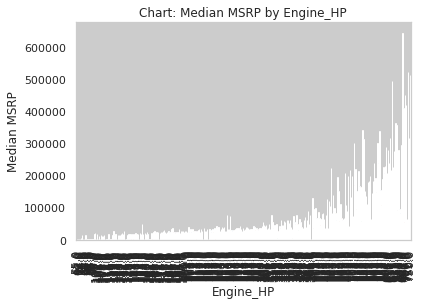

In [87]:
%pylab inline
Make=data.groupby(['Engine_HP'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Engine_HP')
show()

Populating the interactive namespace from numpy and matplotlib


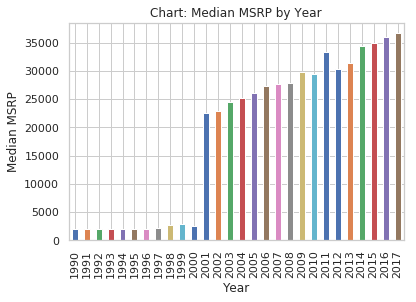

In [88]:
%pylab inline
Make=data.groupby(['Year'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Year')
show()

Populating the interactive namespace from numpy and matplotlib


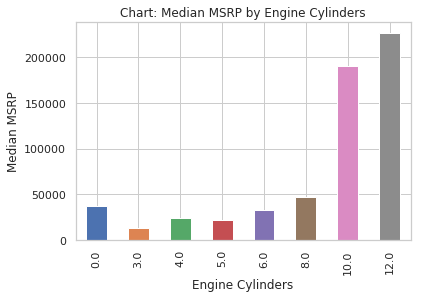

In [56]:
%pylab inline
Make=data.groupby(['Engine Cylinders'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Engine Cylinders')
show()

In [57]:
#data['Market Category'] = data['Market Category'].fillna('None')
data=data.drop(['city mpg'],axis=1)
#data=data.drop(['highway MPG'],axis=1)
data=data.drop(['highway MPG'],axis=1)
data=data.drop(['Engine Fuel Type'],axis=1)
data=data.drop('Market Category',axis=1)


In [58]:
m=data["MSRP"].isnull().any()
print(m[m])
m=data["Engine_HP"].isnull().any()
print(m[m])
data["Engine_HP"].fillna(data["Engine_HP"].mean())
data['Engine_HP'] = data['Engine_HP'].apply(lambda x: x if not pd.isnull(x) else data["Engine_HP"].mean())
m=data["Engine_HP"].isnull().any()
print(m[m])

[]
[ True]
[]


In [59]:
data.loc[(data['Make']=='Mazda')&(data['Model']=='RX-8'),'Engine Cylinders']=data['Make']
data.loc[(data['Make']=='Mazda')&(data['Model']=='RX-7'),'Engine Cylinders']=0
data.loc[(data['Make']=='Mitsubishi')&(data['Model']=='i-MiEV'),'Engine Cylinders']=0
data.loc[(data['Make']=='Chevrolet')&(data['Model']=='Bolt EV'),'Engine Cylinders']=0
data.loc[(data['Make']=='Volkswagen')&(data['Model']=='e-Golf'),'Engine Cylinders']=0


In [60]:
data["Engine Cylinders"].fillna(0, inplace = True )

In [61]:
#We do some data cleansing, as needed
data["Number of Doors"] = data["Number of Doors"].replace("?",0)
data["Number of Doors"] = data["Number of Doors"].astype('float32')
data["MSRP"] = data["MSRP"].replace("?",0)
data["MSRP"] = data["MSRP"].astype("float32")

In [62]:
data["Number of Doors"].fillna(value = data["Number of Doors"].mode()[0], inplace = True )

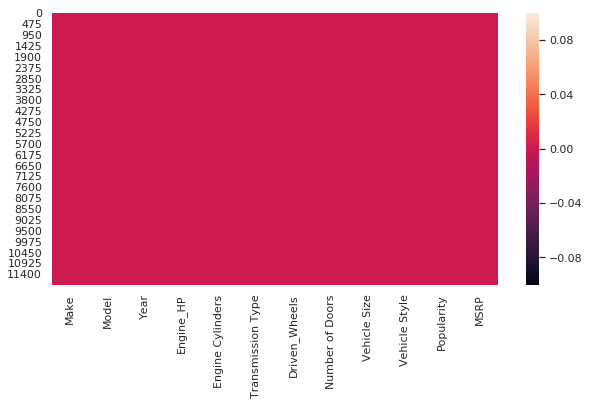

In [63]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull())


In [64]:
non_number_col = data.select_dtypes(include = "object").columns
number_col = data.select_dtypes(exclude = "object").columns

In [65]:
from sklearn.preprocessing import LabelEncoder
for c in non_number_col:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))


In [66]:
y = data['MSRP']

In [67]:
del data['MSRP']



In [68]:
#Take their values in X and y
X = data.values
y = y.values


In [69]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [70]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()


In [71]:
#Fit the model
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  72.15865543491724


In [73]:
linear_pkl = './linear.pkl'
with open(linear_pkl, "wb") as f:
    w = pickle.dump(model,f)

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_m = Ridge()
alpha = [403.5,404,404.5]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(ridge_m, param_grid, scoring="r2",cv=10)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_ridge = grid_search.best_estimator_
model_ridge.score(X_test,y_test)
ridge_pkl = './ridge.pkl'
with open(ridge_pkl, "wb") as f:
    w = pickle.dump(model_ridge,f)

Best: 0.665588 using {'alpha': 404}


In [96]:
lasso_m = Lasso()
alpha = [180.31,180.32,180.33]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(lasso_m, param_grid, scoring="r2",cv=10)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_lasso = grid_search.best_estimator_
model_lasso.score(X_test,y_test)
lasso_pkl = './lasso.pkl'
with open(lasso_pkl, "wb") as f:
    w = pickle.dump(model_lasso,f)

Best: 0.665491 using {'alpha': 180.33}


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso_m, X_train, y_train, cv=5)

In [ ]:
scores

In [ ]:
scores = cross_val_score(ridge_m, X_train, y_train, cv=5)
scores

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
xgb_m = XGBRegressor()
n_estimators = [400, 500, 600, 700, 800]
learning_rate = [0.2, 0.3, 0.4, 0.5]
#max_depth = [5, 4, 3]
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb_m, param_grid, scoring="r2",cv=10) #used to find hyperparameter
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model1 = grid_search.best_estimator_
#preds_xgb = model1.predict(X_test)
#xgb_preds = pd.DataFrame(dict(MSRP=np.expm1(preds_xgb), Id=test.Id))
#xgb_preds.to_csv('./test_preds_xgb.csv', index=False)
#model1.score(X_train_data,y_train)
model1.score(X_test,y_test)

Best: 0.934638 using {'learning_rate': 0.3, 'n_estimators': 800}


0.9849671257741553

In [34]:
xgb_pkl = './xgb.pkl'
with open(xgb_pkl, "wb") as f:
    w = pickle.dump(model1,f)


In [94]:
from sklearn.metrics import mean_squared_error
linear_pkl = './linear.pkl'
mod = pickle.load(open(linear_pkl, 'rb'))
y_preds = mod.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_preds))

21975.441043752322

In [100]:
xgb_pkl = './xgb.pkl'
mod1 = pickle.load(open(xgb_pkl,'rb'))
y1_preds = mod1.predict(X_test)
np.sqrt(mean_squared_error(y_test,y1_preds))

5206.3022

In [95]:
y_r_preds = model_ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_r_preds))

21963.654467955716

In [97]:
y_l_preds = model_lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_l_preds))

21975.810358706694